In [1]:
import random
import json
import os
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import run_analysis
import utils
from input.generator import get_mass_diff

Case: Normalized
rms_deviation: 22.605240095039324
std_difference: 12.586720472916802
avg: -18.77688880415722
rms_deviation: 15.800918368811383
std_difference: 7.197140414220113
avg: -14.066636357089612
rms_deviation: 38.3228964009763
std_difference: 17.793788986794723
avg: 33.94150664153442
Case: NoNormalized
rms_deviation: 26.45714454240792
std_difference: 11.760373261910612
avg: -23.699668724093712
rms_deviation: 99.50996600712423
std_difference: 48.56920860867189
avg: 86.85199118239917
rms_deviation: 17.628500691656384
std_difference: 7.763713003690272
avg: 15.826840344273942
Case: ZNOnly
rms_deviation: 6.889050639396161
std_difference: 4.221317887214
avg: -5.444218689681686
rms_deviation: 21.21181415634731
std_difference: 9.766502290053278
avg: 18.829673832884925
rms_deviation: 20.648233684214308
std_difference: 8.627828499486387
avg: -18.759270409608376
Case: AddLayer
rms_deviation: 115.15897733005615
std_difference: 54.9406859308523
avg: 101.20827539203215
rms_deviation: 95.5494

/mnt/Data/2_Area_Learn/Master Degree/2 Area_Courses/Master Thesis/1_Project/4_BSk24_Emu/run_analysis.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


rms_deviation: 94.42732118839722
std_difference: 43.31057208164837
avg: 83.90897310778374
Case: SmallerS
rms_deviation: 84.15545577270025
std_difference: 38.808458894073596
avg: -74.67292822593981
rms_deviation: 12.32813213144821
std_difference: 4.596503772823151
avg: -11.43918801076617
rms_deviation: 177.51213988684887
std_difference: 83.22702855900219
avg: 156.79231651117743


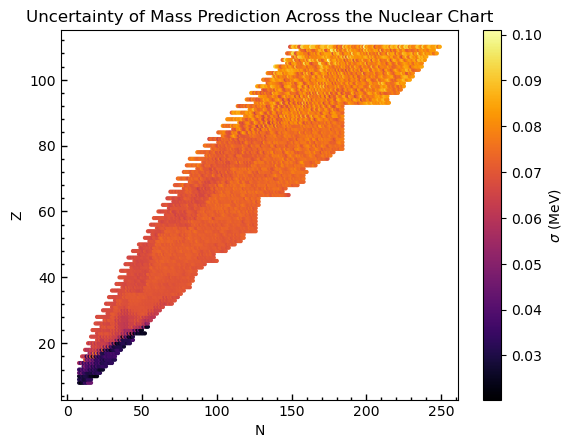

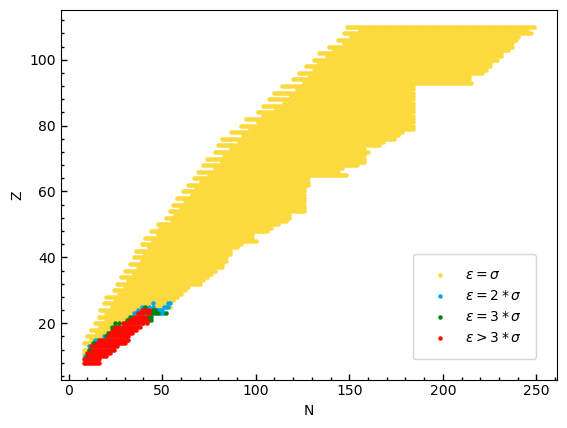

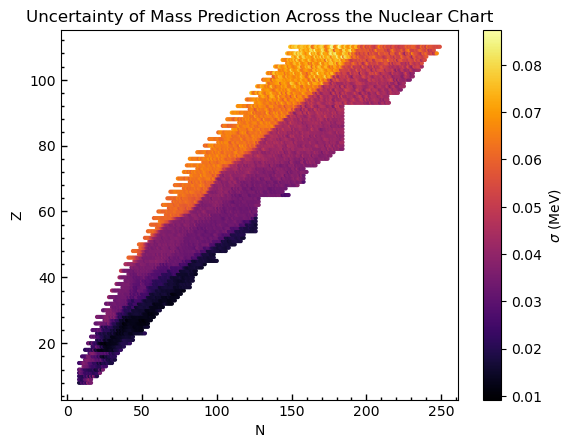

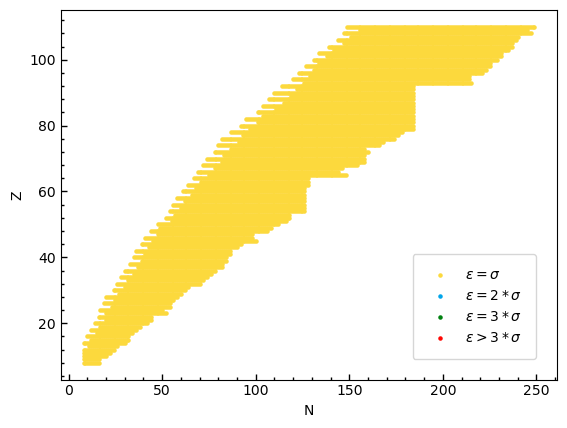

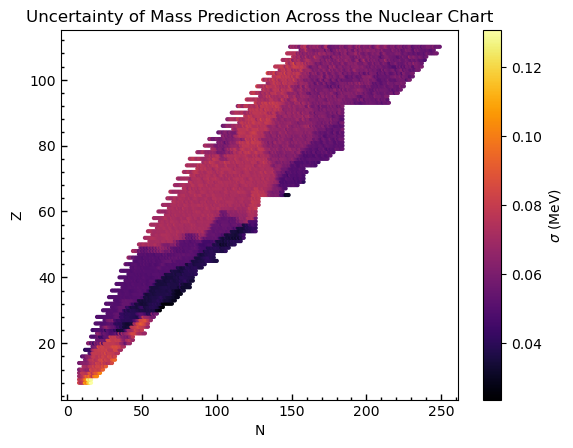

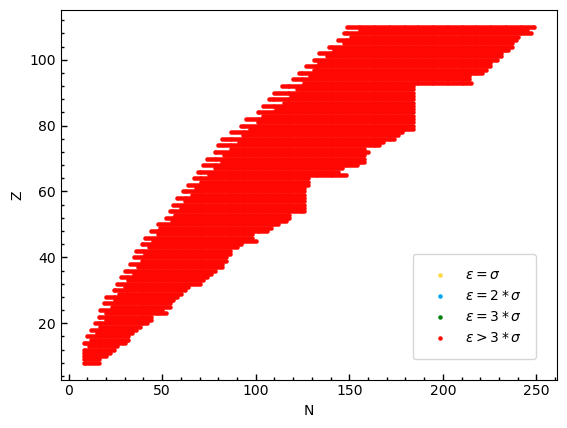

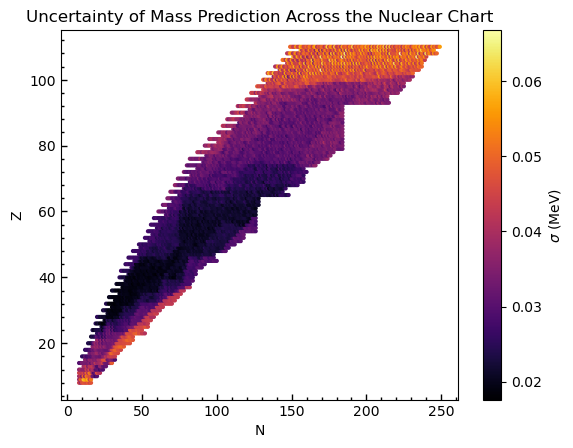

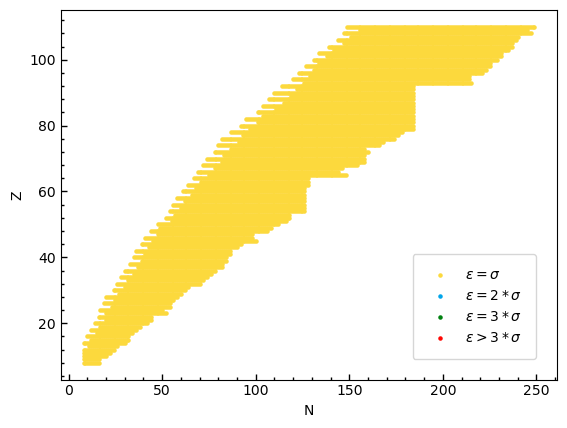

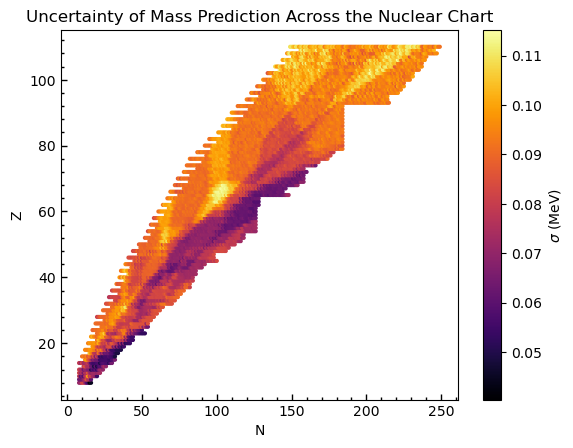

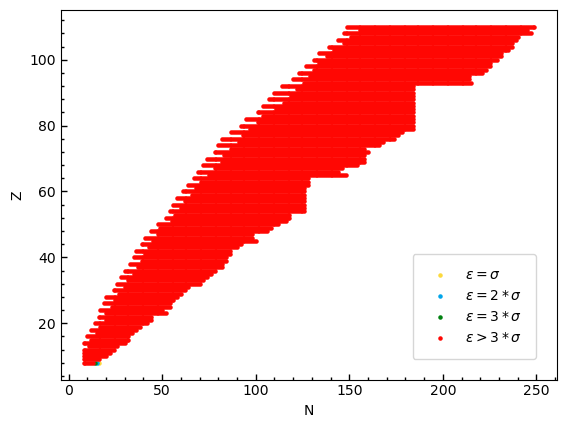

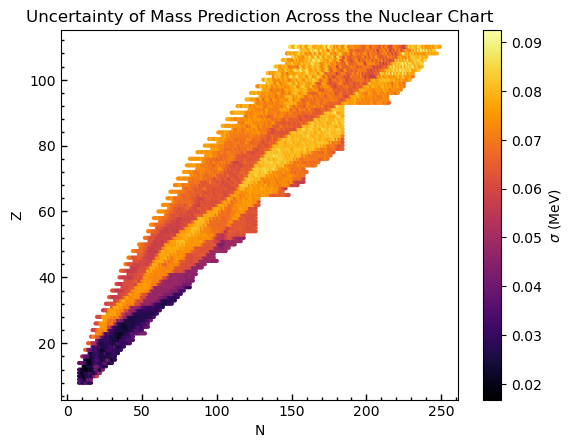

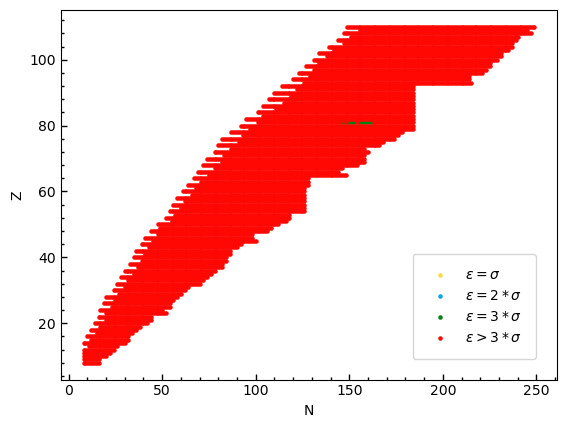

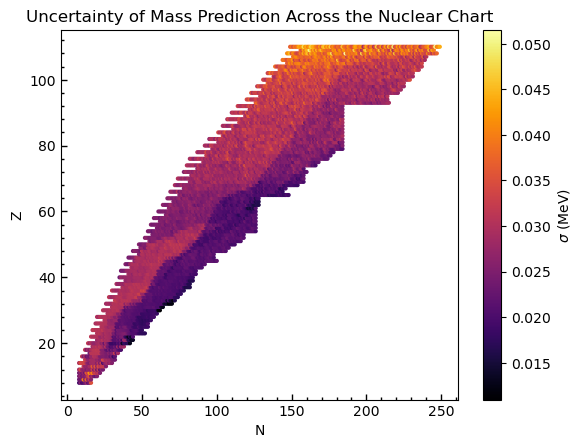

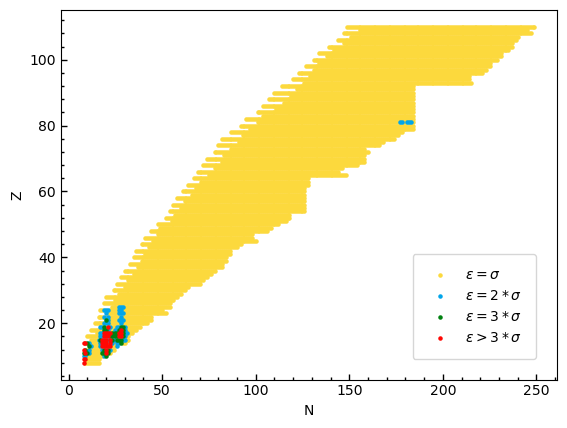

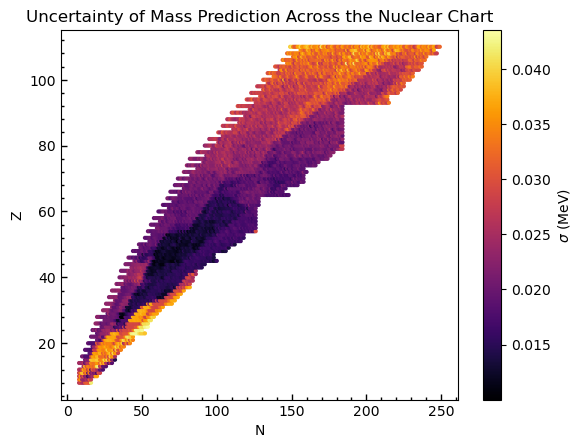

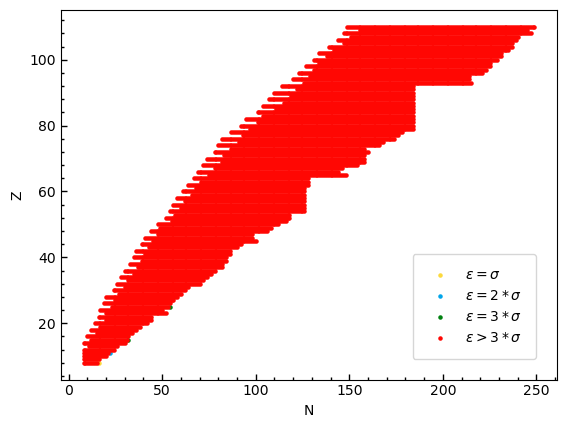

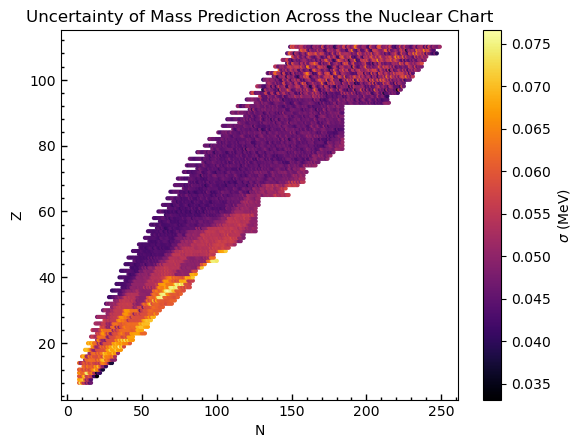

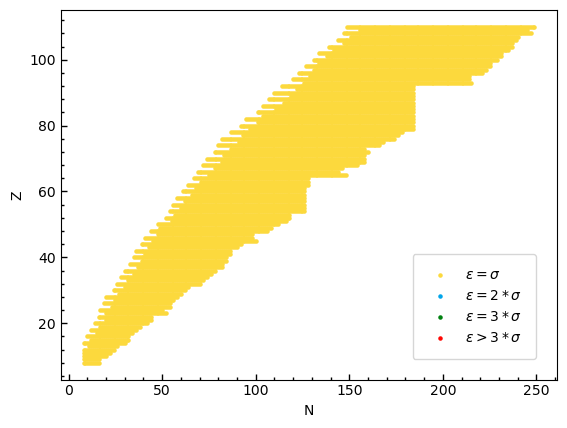

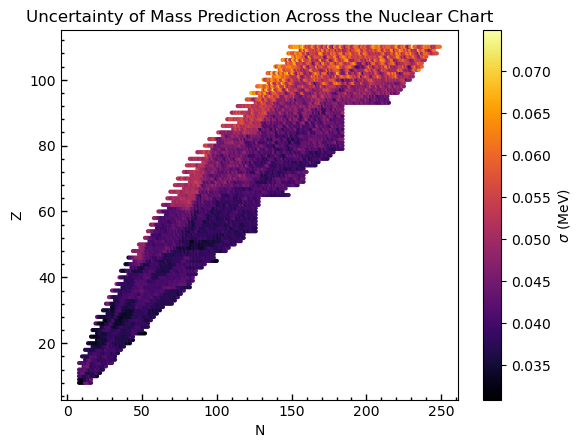

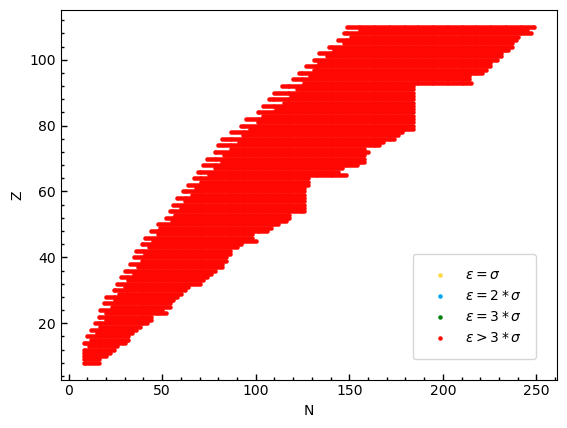

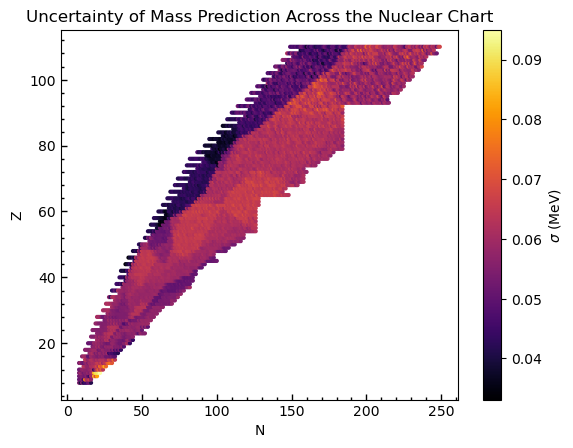

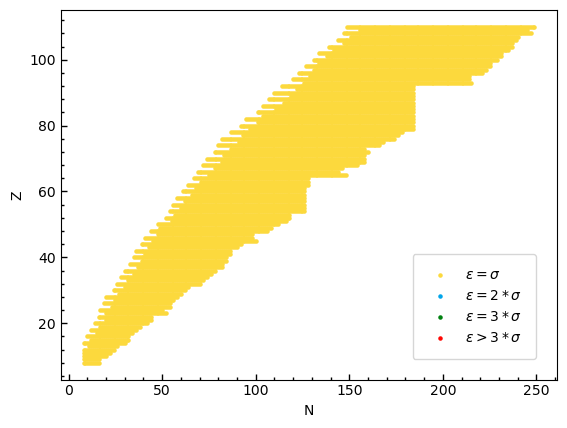

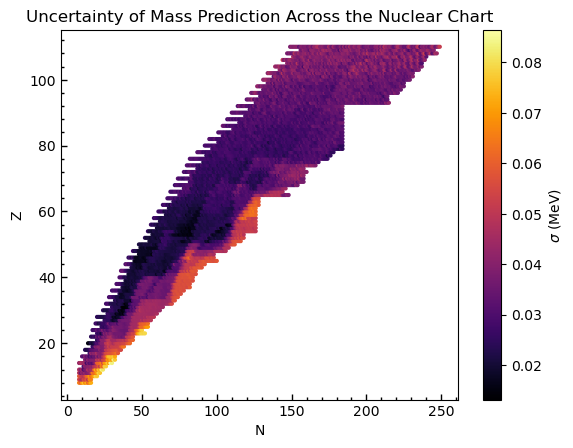

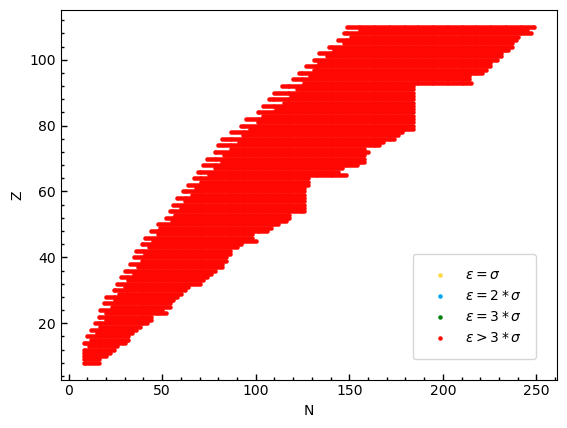

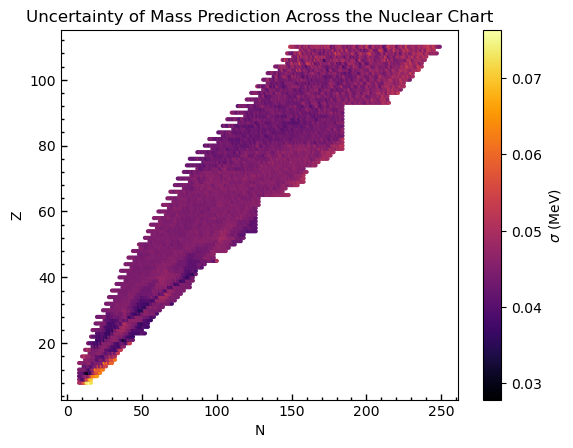

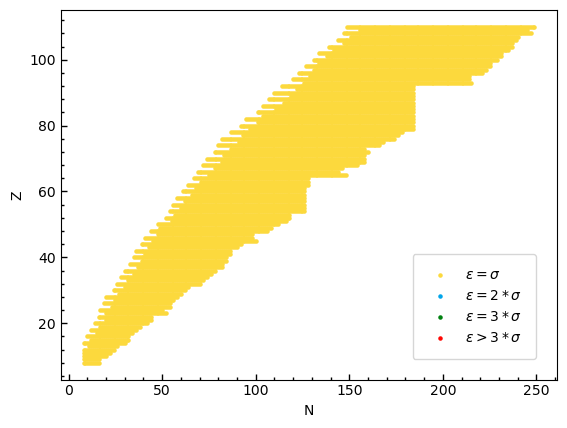

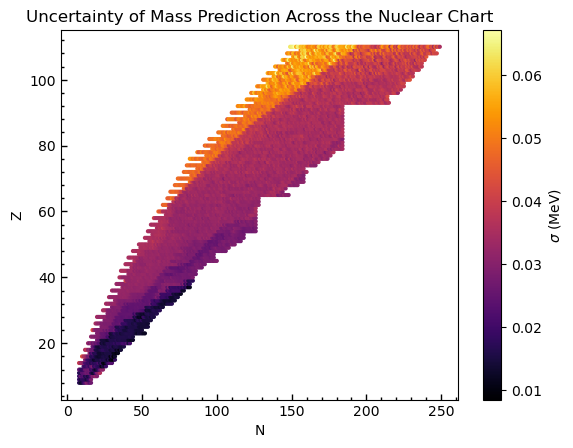

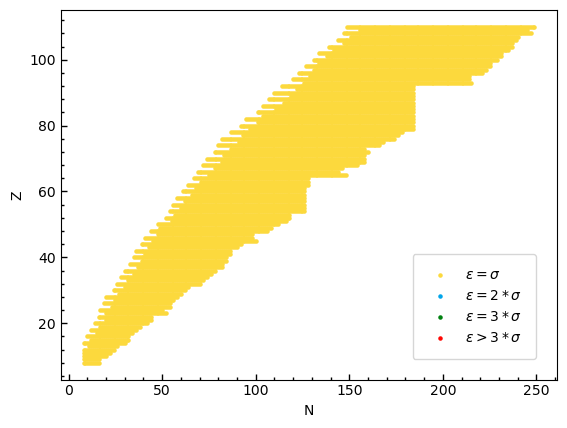

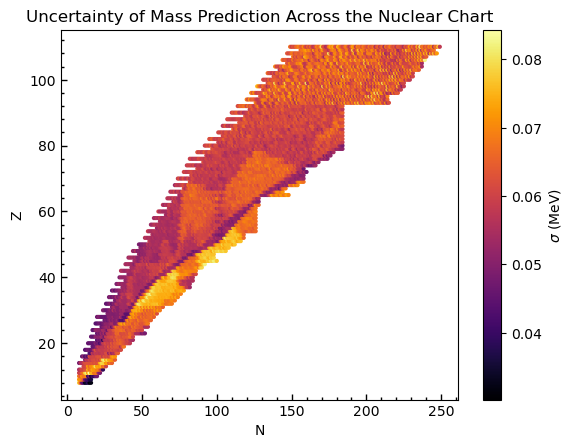

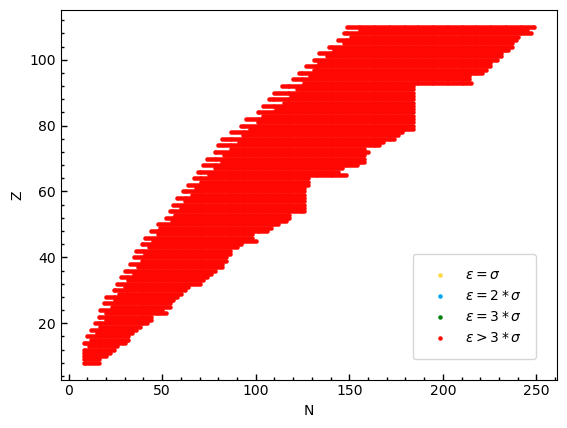

In [2]:
# results = {"Normalized":[f'EXT Fixed, code']}
codes = [4277, 4630, 8817]
template = "EXT Fixed{}, Code: {}.0"
results = {
    "Normalized": [template.format("", code) for code in codes],
    "NoNormalized": [template.format(" NN", code) for code in codes],
    "ZNOnly": [template.format(" fZN", code) for code in codes],
    "AddLayer": [template.format(" xl", code) for code in codes],
    "SmallerS": [template.format(" p1l", code) for code in codes],
}
# result = ["EXT Fixed p1l, Code: 8817.0"]
dir = "data/output/"

# run_analysis.main(dir + result[0] + ".dat")
for key, value in results.items():
    print(f"Case: {key}")
    for result in value:
        run_analysis.main(dir + result + ".dat")

In [5]:
file = dir + results["Normalized"][0] + ".dat"
ds = pd.read_csv(file, sep=";")
db = pd.read_csv("data/input/bsk24_mass_table.csv", sep=";")
print(ds["Difference"].mean())

-18.77688880415722


m_bsk24: 5004   -20.87
Name: m, dtype: float64


/mnt/Data/2_Area_Learn/Master Degree/2 Area_Courses/Master Thesis/1_Project/4_BSk24_Emu/run_analysis.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


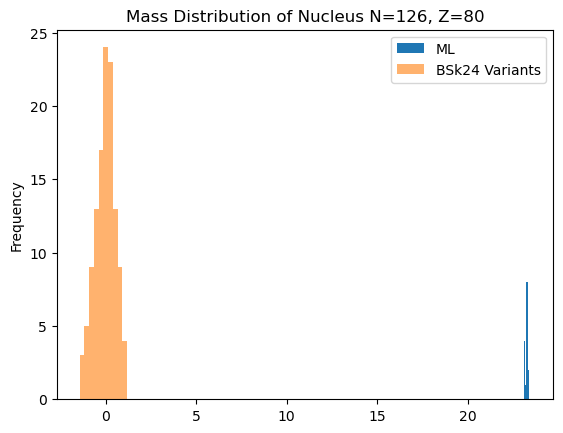

In [10]:
ni = 126
zi = 80
mbsk = db[(db["N"] == ni) & (db["Z"] == zi)]["m"]
dnz = ds[(ds["N"] == ni) & (ds["Z"] == zi)]
print(f"m_bsk24: {mbsk}")
run_analysis.plot_histogram_nucleus(ni, zi, ds)
dnz["BSk24"].plot(kind="hist", alpha=0.6, label="BSk24 Variants")
plt.legend()

rms_deviation: 1.1209254573319283
std_difference: 1.0890963965646532


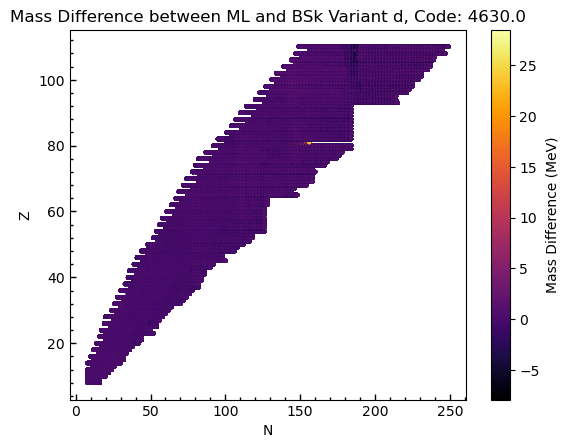

rms_deviation: 1.2131886662752305
std_difference: 1.1617586133506632


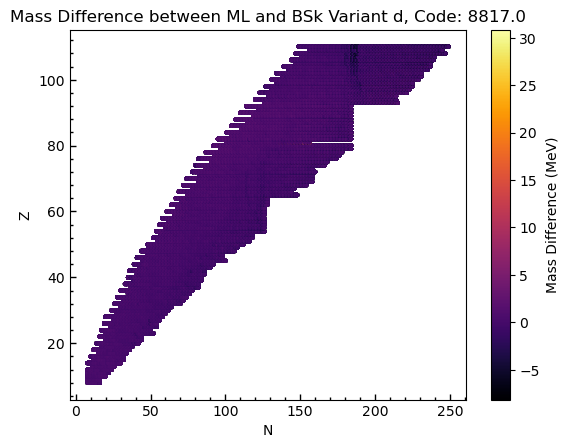

rms_deviation: 1.104092118498344
std_difference: 1.1033216752326584


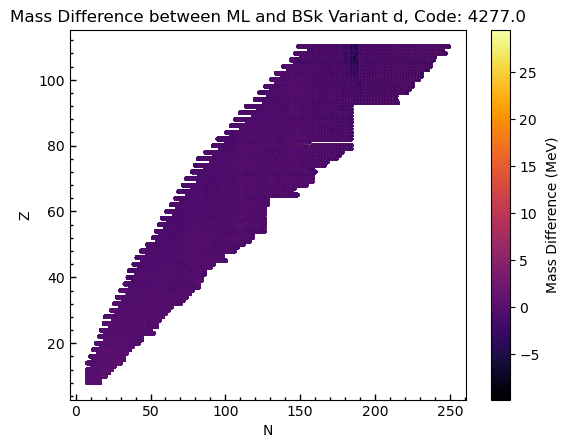

In [16]:
# Analyse the deviation of one variant
import glob

file_pattern = "data/output/EXT Fixed, Code:*"

result_one = glob.glob(file_pattern)

for aa in range(len(result_one)):
    analysed = aa
    analysed_variant = result_one[analysed][20:-4]
    dat = pd.read_csv(result_one[analysed], sep=";")
    dat = dat[((dat["Z"] != 81)) | ((dat["Z"] == 81) & (dat["N"] < 157))]
    # dat["sign"] = dat["Difference"].apply(lambda x: -1 if x < 0 else 1)

    rms_dev = np.sqrt((dat["Difference"] ** 2).mean())
    std_diff = dat["Difference"].std()

    fig, ax = plt.subplots()
    scatter = ax.scatter(dat["N"], dat["Z"], c=dat["Difference"], s=4, cmap="inferno")
    colourbar = fig.colorbar(scatter, ax=ax)
    colourbar.set_label("Mass Difference (MeV)")
    ax.set_title(f"Mass Difference between ML and BSk Variant {analysed_variant}")

    ax.set_xlabel("N")
    ax.set_ylabel("Z")
    utils.plot.set_tick(ax)

    print(f"rms_deviation: {rms_dev}")
    print(f"std_difference: {std_diff}")
    fig.savefig(f"variant_{analysed_variant}.png")
    plt.show()

rms_deviation: 6.6511093794113725
std_difference: 5.90184798681107


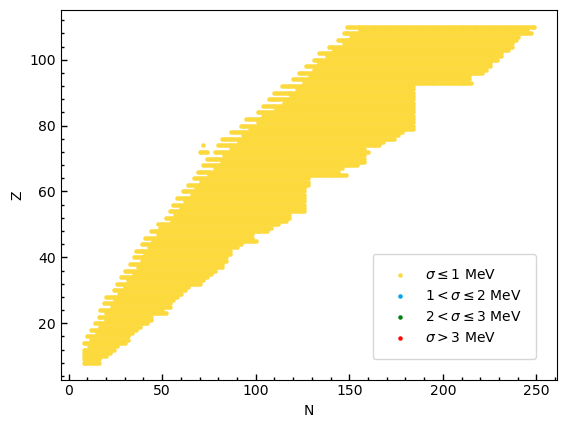

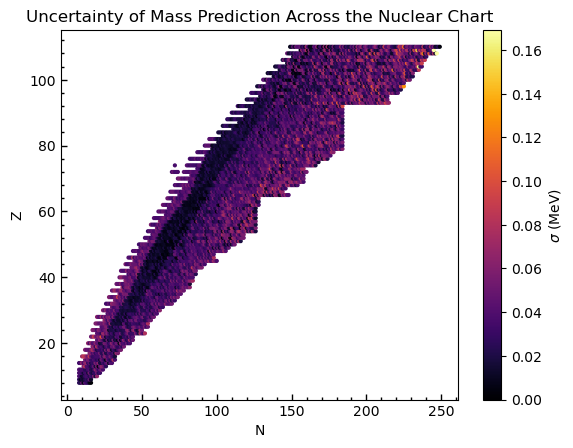

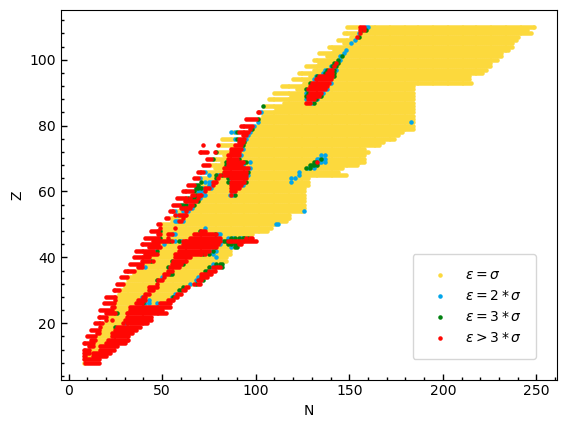

In [ ]:
ff = "data/output/EXT 24 run custom loss, code: 369.dat"
ssd = pd.read_csv(ff, sep=";")
run_analysis.main(ff)

m_bsk24: 83.2


ValueError: zero-size array to reduction operation fmax which has no identity

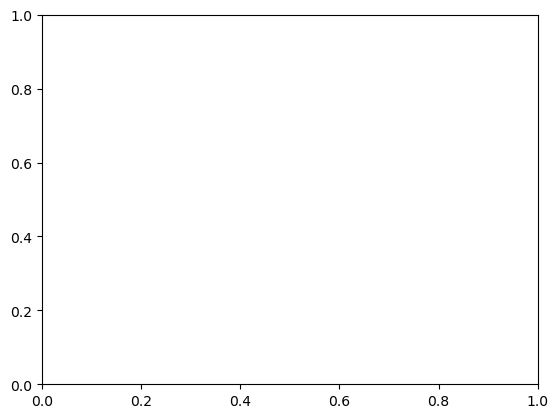

In [ ]:
ni = 126
zi = 100
mbsk = db[(db["N"] == ni) & (db["Z"] == zi)]["m"]
print(f"m_bsk24: {mbsk.iloc[0]}")

run_analysis.plot_histogram_nucleus(ni, zi, ssd, resolution=0.01)

<Axes: ylabel='Frequency'>

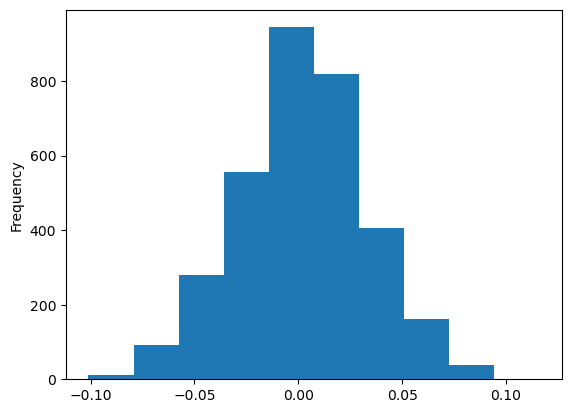

In [ ]:
cek = "param(01)"
bs = BSk24_VARIANS_EXT["param(01)"] - BSk24["t_0"].item()
bs2 = bs[bs < 0]
random_param = bs.sample(frac=0.3)
random_param.plot(kind="hist")

<Axes: ylabel='Frequency'>

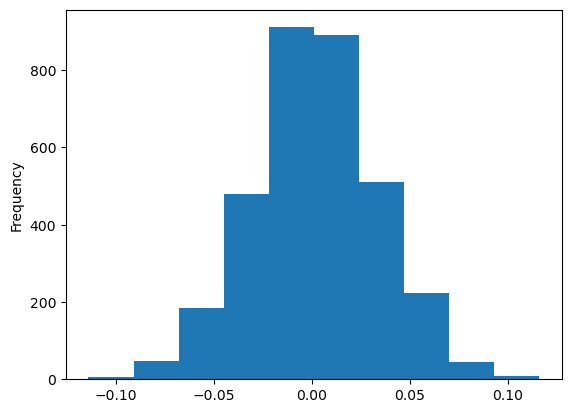

In [ ]:
w = np.random.exponential(scale=1.0, size=len(bs))
random_param = bs.sample(frac=0.3, weights=w)
random_param.plot(kind="hist")

In [ ]:
bs2

0       -0.041
2       -0.014
8       -0.014
9       -0.011
10      -0.033
         ...  
11013   -0.003
11014   -0.016
11017   -0.007
11018   -0.026
11021   -0.005
Name: param(01), Length: 5099, dtype: float64

<Axes: ylabel='Frequency'>

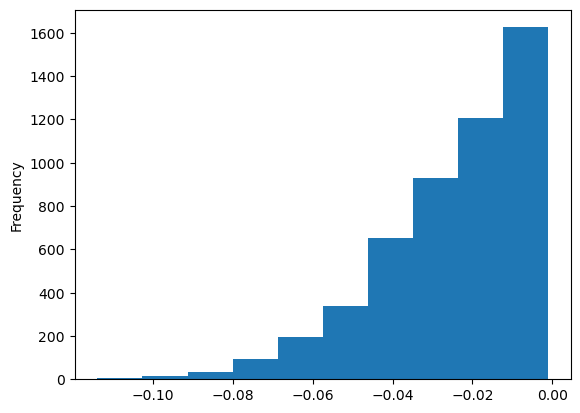

In [ ]:
bs2.plot(kind="hist")